In [1]:
import os


In [ ]:
NEWS_API_KEY="add apikey"

In [3]:
import requests

def get_news(topic, api_key, num_articles=3):
    url = "https://newsapi.org/v2/everything"
    params = {
        "q": topic,
        "language": "en",
        "sortBy": "publishedAt",
        "pageSize": num_articles,
        "apiKey": api_key,
    }

    response = requests.get(url, params=params)

    if response.status_code != 200:
        print("Failed to fetch news:", response.status_code, response.text)
        return []

    data = response.json()
    articles = data.get("articles", [])

    result = []
    for article in articles:
        result.append({
            "title": article.get("title", ""),
            "description": article.get("description", ""),
            "url": article.get("url", "")
        })

    return result


In [4]:
!pip install mistralai

In [5]:
import mistralai
print(mistralai.__version__)


1.9.2


In [ ]:
from huggingface_hub import InferenceClient

HF_API_KEY = "add apikey"


In [7]:
import re
from huggingface_hub import InferenceClient

def generate_news_script_with_mistral(news_data):
    article_blocks = ""
    for i, article in enumerate(news_data, 1):
        article_blocks += f"{i}. {article['title']}\n{article['description']}\n\n"

    prompt = f"""
You are a warm, professional news anchor delivering the evening bulletin with clarity and confidence.
You are speaking directly to viewers as if live on air.

Given the following news headlines and descriptions, create a cohesive, engaging spoken script that:
- Begins with a warm, friendly greeting and introduces Julius by name.
- Naturally flows from one story to the next — do not number them or mention sections like "in tech news".
- Uses smooth transitions that sound like human speech.
- Ends with a warm, thoughtful sign-off.
- Avoids any formatting (no bullet points, no headings, no [pause] or stage directions).
- Do not call this a script or refer to your own writing.

Just return the final speech text as Julius would say it aloud on live television.

News Articles:
{article_blocks}
"""

    client = InferenceClient(
        model="mistralai/Mistral-7B-Instruct-v0.2",
        token=HF_API_KEY
    )

    response = client.chat_completion(
        messages=[
            {"role": "system", "content": "You are a helpful news script writing assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=800,
        temperature=0.7
    )

    output = response.choices[0].message["content"].strip()


    output = re.sub(r"^(?:\[.*?\]|.*?script.*?:|julius:)\s*", "", output, flags=re.IGNORECASE)
    output = re.sub(r"^(?:\[.*?\]|.*?script.*?:|Transition:)\s*", "", output, flags=re.IGNORECASE)
    return output.strip()


In [8]:
!pip install gTTS

In [9]:
!pip install --upgrade diffusers transformers accelerate safetensors


  Using cached accelerate-1.9.0-py3-none-any.whl.metadata (19 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.1/367.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [10]:
!pip install requests pillow


In [11]:
from gtts import gTTS
from IPython.display import Audio, display
from IPython.display import Audio, display
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt

def speak_in_colab(script_text):
    tts = gTTS(text=script_text, lang='en')
    tts.save("temp.mp3")
    print(" Ready to play:")
    display(Audio("temp.mp3", autoplay=True))  # Autoplay audio in Colab cell


In [12]:

def load_image_pipeline():
    return StableDiffusionPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2", torch_dtype=torch.float16, revision="fp16"
    ).to("cuda")


def generate_and_display_images(pipe, articles, count=5):
    selected = articles[:count]
    for article in selected:
        prompt = f"illustrative graphics, charts, or pictures for: {article['title']} - {article['description']}"
        print(f" Generating image for: {article['title']}")
        img = pipe(prompt).images[0]


        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis("off")
        plt.title(article['title'], fontsize=12)
        plt.show()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



 Final Script by Julius:
 Good evening, everyone. I'm Julius here to bring you tonight's latest news. Let's start with a look back at Hollywood. Eighteen years have passed since Spider-Man 3 graced our screens, and its box office success is more impressive than ever. Screen Rant has the details.

But Hollywood isn't just about the past. Let's move on to X-Men: First Class and the thoughts of actor Edi Gathegi regarding his character Darwin's controversial end.

Now, for a real-life Indiana Jones moment, archaeologists in Jordan have made an incredible discovery beneath Petra's Treasury. Twelve skeletons and 2,000-year-old artifacts are just some of the secrets they've uncovered.

Transitioning to music, Turnstiles, an artist with a challenging fourth album, shares his thoughts on the commercial failure.

Unfortunately, tragedy struck outside an LA nightclub over the weekend. Thirty people were injured when a car plowed through the crowded sidewalk. The driver was later beaten and shot

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:325: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2 via `revision='fp16'`. This behavior is deprecated and will be removed in diffusers v1. One should use `variant='fp16'` instead. However, it appears that stabilityai/stable-diffusion-2 currently does not have the required variant filenames in the 'main' branch. 
 The Diffusers team and community would be very grateful if you could open an issue: https://github.com/huggingface/diffusers/issues/new with the title 'stabilityai/stable-diffusion-2 is missing fp16 files' so that the correct variant file can be added.
  warnings.warn(


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/815 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/900 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


 Generating image for: 18 Years Later, Spider-Man 3’s Box Office Success Only Looks More Impressive


  0%|          | 0/50 [00:00<?, ?it/s]

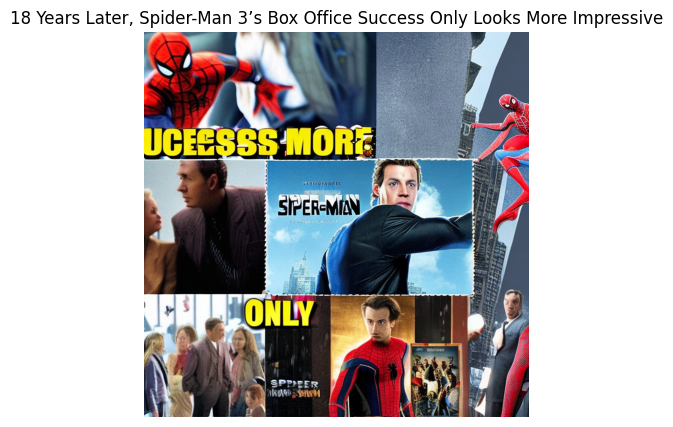

 Generating image for: How X-Men: First Class Star Edi Gathegi Really Feels About Darwin's Controversial Death


  0%|          | 0/50 [00:00<?, ?it/s]

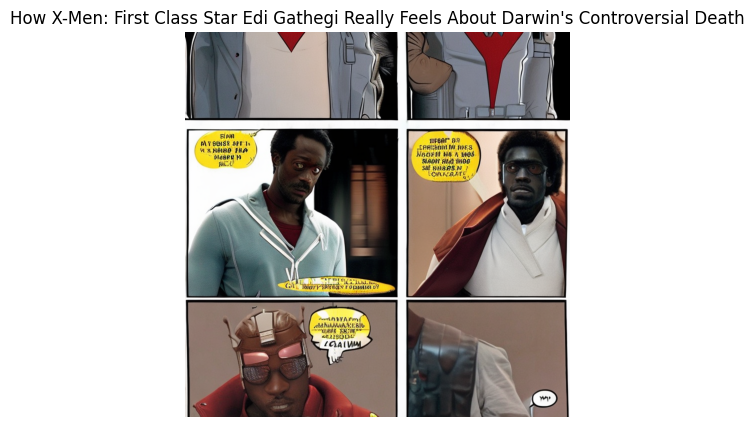

 Generating image for: Archaeologists Made a Real-Life ‘Indiana Jones’ Discovery at a True Wonder of the World


  0%|          | 0/50 [00:00<?, ?it/s]

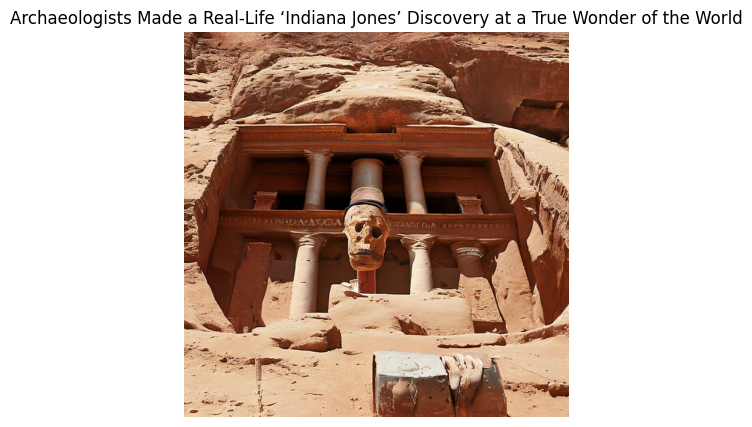

Token indices sequence length is longer than the specified maximum sequence length for this model (246 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['论 : turnstiles ( https :// music . douban . com / subject / 1 8 2 5 6 4 3 /) 评 价 : 还 行 {" blocks ":[{" key ":" 9 oll 4 "," text ":" 第 四 张 专 辑 也 是 他 columbia 商 业 最 差 的 一 张 ， 单 曲 没 进 榜 ， billboard 2 0 0 第 1 1 2 。 这 也 是 他 回 归 纽 约 录 的 第 一 张 ， russell javor ...']


 Generating image for: 销量最差一张，但组建了自己的乐队 (评论: Turnstiles)


  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  fig.canvas

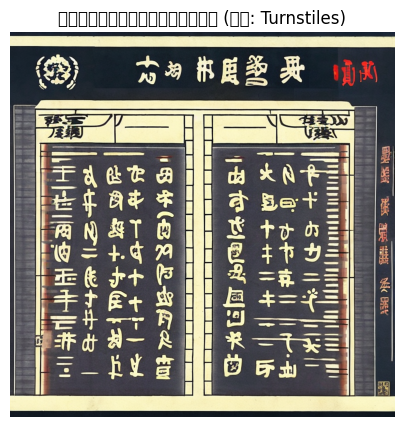

 Generating image for: 30 injured after car plows through LA crowd; Driver pulled from vehicle and shot...


  0%|          | 0/50 [00:00<?, ?it/s]

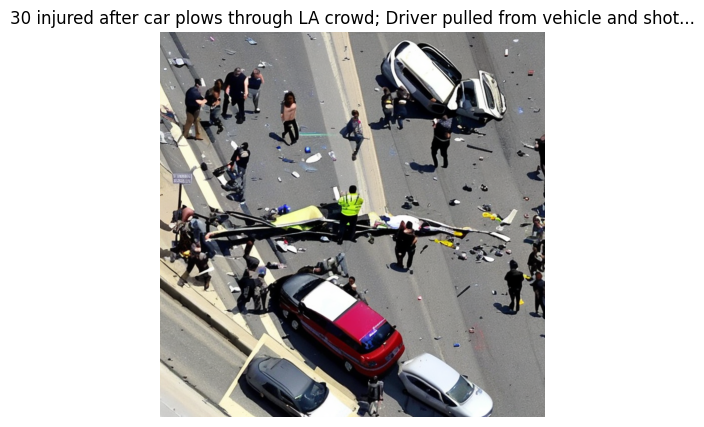

 Generating image for: After plowing his car into a crowd outside an LA nightclub, the driver was beaten and shot by bystanders, police say


  0%|          | 0/50 [00:00<?, ?it/s]

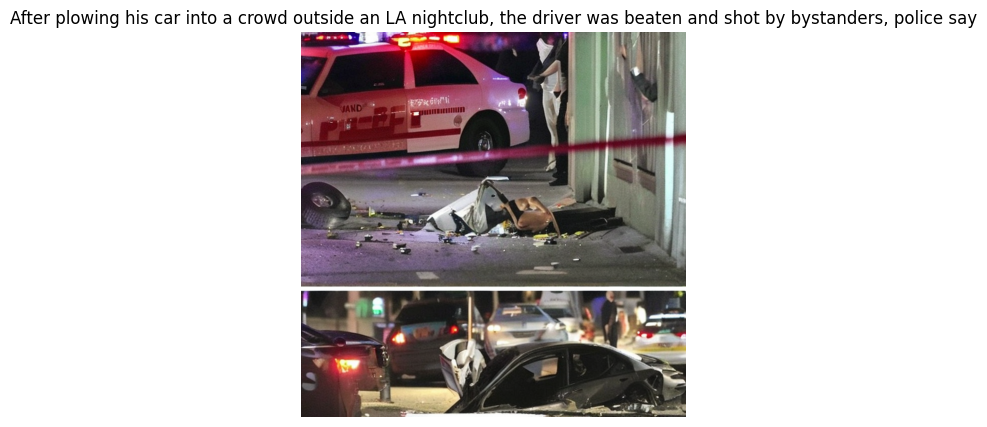

 Generating image for: Alison Sweeney embraces ‘normal’ life in Arizona while prioritizing health over Hollywood hype


  0%|          | 0/50 [00:00<?, ?it/s]

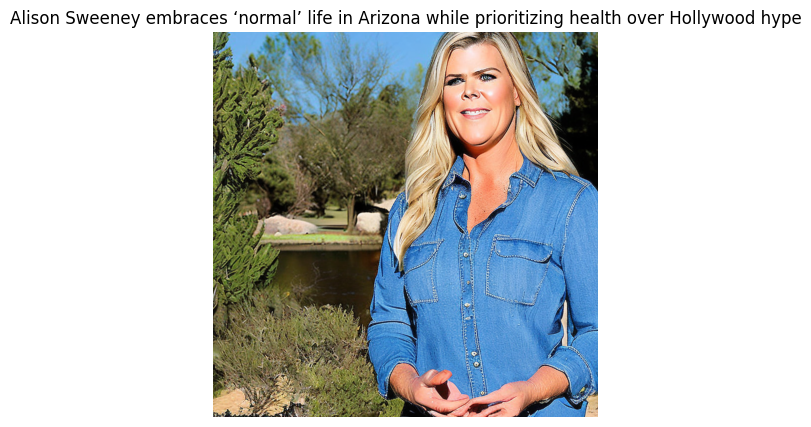

 Generating image for: Want to prepare for The Fantastic Four: First Steps? Skip the movies and watch this animated Disney+ show – it’s the best adaptation of Marvel’s First Family


  0%|          | 0/50 [00:00<?, ?it/s]

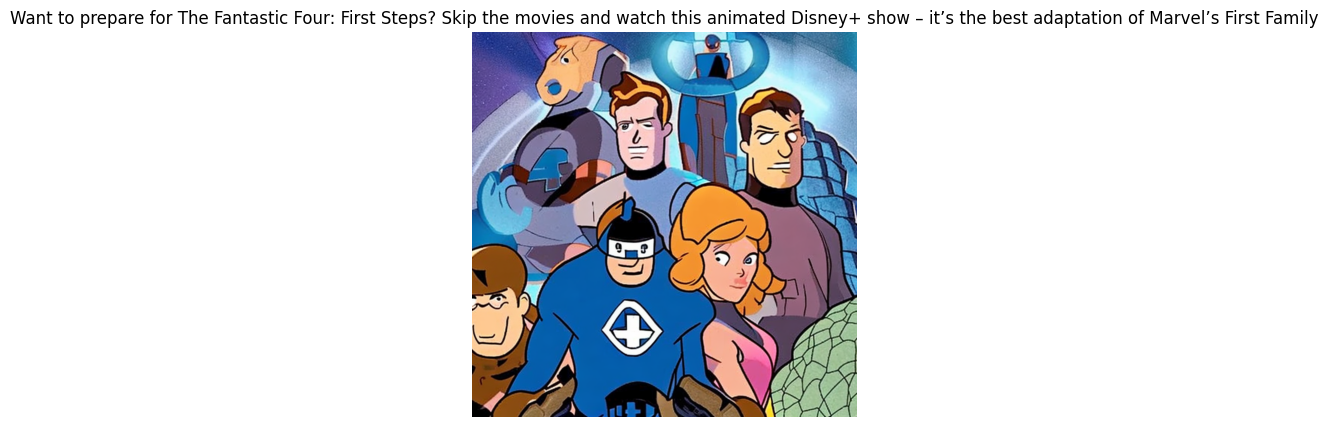

 Generating image for: Eileen Fulton, As the World Turns Legend, Dead at 91


  0%|          | 0/50 [00:00<?, ?it/s]

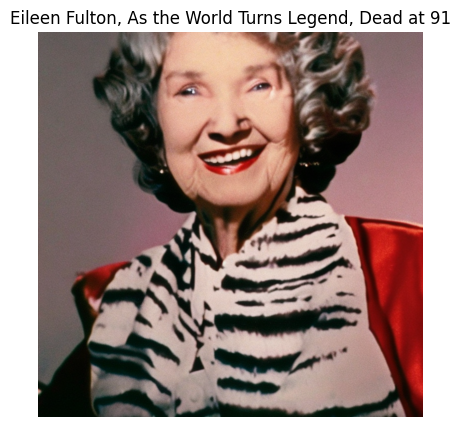

 Generating image for: Lil Win Opens Up About Investments Made in Captain Ibrahim Traore Movie: "I Spent $1M Dollars"


  0%|          | 0/50 [00:00<?, ?it/s]

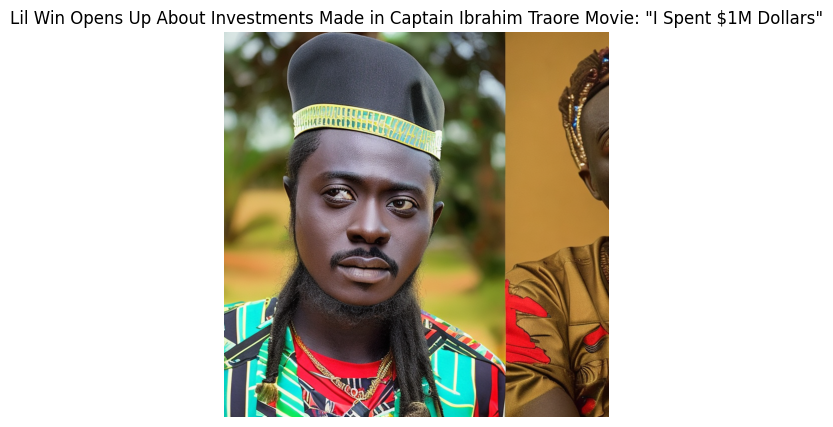

In [13]:

def main():
    topic = "hollywood"
    articles = get_news(topic, NEWS_API_KEY, num_articles=10)

    if not articles:
        print("No news articles fetched.")
        return

    script = generate_news_script_with_mistral(articles)
    print("\n Final Script by Julius:\n", script)


    speak_in_colab(script)

    pipe = load_image_pipeline()
    generate_and_display_images(pipe, articles, count=10)


if __name__ == "__main__":
    main()